In [1]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow as tf
from tensorflow import keras
from keras import layers

from keras.utils import np_utils
import keras.backend as K
import matplotlib.pyplot as plt

## We Test our Autoencoder on our Original Data with no NAs.

In [2]:
df = pd.read_csv('../data/original.csv',  index_col=0)
y = np.array(df['group'])
encoder = LabelEncoder()
encoder.fit(y)
y = encoder.transform(y)

#scale the data
X = df.drop(['group'], axis = 1)
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [3]:
   # accepts df for x and check for y
latent_space = 2

input_layer = keras.Input(shape = (199,))
encoded = layers.Dense(128, activation= 'relu')(input_layer)
encoded = layers.Dense(64, activation='relu')(encoded)
encoded = layers.Dense(latent_space, activation='relu')(encoded)

decoded = layers.Dense(64, activation='relu')(encoded)
decoded = layers.Dense(128, activation='relu')(decoded)
decoded = layers.Dense(199, activation='linear')(decoded)

2023-02-24 15:12:27.202180: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [4]:
encoder = keras.Model(input_layer, encoded)
autoencoder = keras.Model(input_layer, decoded)
autoencoder.compile(optimizer='adam', loss='mse')

autoencoder.fit(X, X,
                epochs=200,
                batch_size=32,
                validation_split = 0.2)

Epoch 1/200
3/3 [==============================] - 0s 43ms/step - loss: 1.0124 - val_loss: 0.9573
Epoch 2/200
3/3 [==============================] - 0s 8ms/step - loss: 1.0102 - val_loss: 0.9575
Epoch 3/200
3/3 [==============================] - 0s 8ms/step - loss: 1.0092 - val_loss: 0.9578
Epoch 4/200
3/3 [==============================] - 0s 8ms/step - loss: 1.0072 - val_loss: 0.9570
Epoch 5/200
3/3 [==============================] - 0s 8ms/step - loss: 1.0046 - val_loss: 0.9536
Epoch 6/200
3/3 [==============================] - 0s 8ms/step - loss: 0.9995 - val_loss: 0.9491
Epoch 7/200
3/3 [==============================] - 0s 8ms/step - loss: 0.9932 - val_loss: 0.9439
Epoch 8/200
3/3 [==============================] - 0s 8ms/step - loss: 0.9872 - val_loss: 0.9347
Epoch 9/200
3/3 [==============================] - 0s 8ms/step - loss: 0.9802 - val_loss: 0.9243
Epoch 10/200
3/3 [==============================] - 0s 9ms/step - loss: 0.9724 - val_loss: 0.9147
Epoch 11/200
3/3 [==========

3/3 [==============================] - 0s 8ms/step - loss: 0.8747 - val_loss: 0.8336
Epoch 85/200
3/3 [==============================] - 0s 8ms/step - loss: 0.8747 - val_loss: 0.8336
Epoch 86/200
3/3 [==============================] - 0s 8ms/step - loss: 0.8747 - val_loss: 0.8335
Epoch 87/200
3/3 [==============================] - 0s 9ms/step - loss: 0.8747 - val_loss: 0.8333
Epoch 88/200
3/3 [==============================] - 0s 8ms/step - loss: 0.8748 - val_loss: 0.8332
Epoch 89/200
3/3 [==============================] - 0s 8ms/step - loss: 0.8747 - val_loss: 0.8335
Epoch 90/200
3/3 [==============================] - 0s 9ms/step - loss: 0.8746 - val_loss: 0.8335
Epoch 91/200
3/3 [==============================] - 0s 8ms/step - loss: 0.8747 - val_loss: 0.8337
Epoch 92/200
3/3 [==============================] - 0s 9ms/step - loss: 0.8747 - val_loss: 0.8337
Epoch 93/200
3/3 [==============================] - 0s 8ms/step - loss: 0.8747 - val_loss: 0.8341
Epoch 94/200
3/3 [===============

3/3 [==============================] - 0s 8ms/step - loss: 0.8742 - val_loss: 0.8325
Epoch 168/200
3/3 [==============================] - 0s 8ms/step - loss: 0.8741 - val_loss: 0.8325
Epoch 169/200
3/3 [==============================] - 0s 8ms/step - loss: 0.8742 - val_loss: 0.8327
Epoch 170/200
3/3 [==============================] - 0s 8ms/step - loss: 0.8741 - val_loss: 0.8331
Epoch 171/200
3/3 [==============================] - 0s 8ms/step - loss: 0.8742 - val_loss: 0.8334
Epoch 172/200
3/3 [==============================] - 0s 7ms/step - loss: 0.8742 - val_loss: 0.8342
Epoch 173/200
3/3 [==============================] - 0s 8ms/step - loss: 0.8742 - val_loss: 0.8348
Epoch 174/200
3/3 [==============================] - 0s 8ms/step - loss: 0.8741 - val_loss: 0.8350
Epoch 175/200
3/3 [==============================] - 0s 8ms/step - loss: 0.8741 - val_loss: 0.8353
Epoch 176/200
3/3 [==============================] - 0s 8ms/step - loss: 0.8741 - val_loss: 0.8351
Epoch 177/200
3/3 [=====

### It works well

4/4 [==============================] - 0s 846us/step


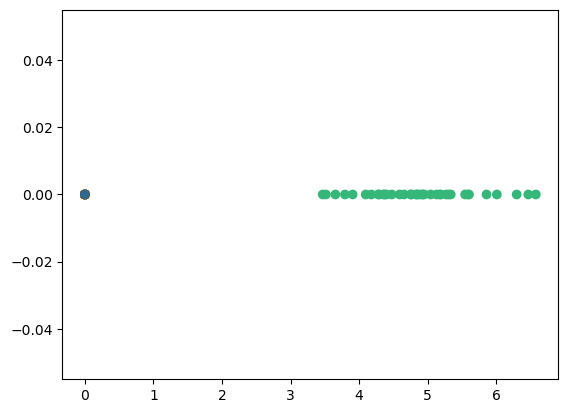

In [5]:
embeddings = encoder.predict(X)

plt.scatter(embeddings[:,0], embeddings[:,1], c = y)
plt.show()

## We'll Test out Custom Functions

### Custom Activation Function

In [6]:
# Test Tensor with NA Values
y_actual = tf.constant([
    [0.1, 1, np.nan, 0.5],
    [0.4, 0.2, 0.8, 0],
    [np.nan, 1.3, np.nan, 0.2],
    [0.1, 0.1, 0.6, np.nan],
])

y_predicted = tf.constant([
    [0.7, 0.7, 0.1, 0.3],
    [0.6, 0.1, 0.1, 0],
    [0.4, 0.9, 0.9, 0.2],
    [0.1, 0.4, 0.4, 1.2],
])

In [7]:
# Custom ReLu function which takes NA values
def relu_nan(x):
    x_true = tf.where(tf.math.is_nan(x), tf.zeros_like(x), x)
    return K.relu(x_true, max_value=None)

### Custom NA MSE Function

In [9]:
def nan_mse(y_actual, y_predicted):
    stack = tf.stack((tf.math.is_nan(y_actual), 
                      tf.math.is_nan(y_predicted)),
                     axis=1)
    is_nans = K.any(stack, axis=1)
    per_instance = tf.where(is_nans,
                            tf.zeros_like(y_actual),
                            tf.square(tf.subtract(y_predicted, y_actual)))
    print(per_instance)
    return tf.reduce_mean(per_instance, axis=0)

In [10]:
nan_mse(y_actual, y_predicted)

NameError: name 'y_true' is not defined

In [ ]:
def nan_mse2(y_true, y_pred):
    mask = tf.logical_not(tf.math.is_nan(y_true))
    squared_error = tf.square(tf.boolean_mask(y_true - y_pred, mask))
    return tf.reduce_mean(squared_error)

nan_mse(y_actual, y_predicted)

In [ ]:
input_layer2 = keras.Input(shape = (199,))
encoded2 = layers.Dense(128, activation= relu_nan)(input_layer2)
encoded2 = layers.Dense(64, activation= relu_nan)(encoded2)
encoded2 = layers.Dense(latent_space, activation='relu')(encoded2)

decoded2 = layers.Dense(64, activation= relu_nan)(encoded2)
decoded2 = layers.Dense(128, activation= relu_nan)(decoded2)
decoded2 = layers.Dense(199, activation='linear')(decoded2)

In [ ]:
encoder2 = keras.Model(input_layer2, encoded2)
autoencoder2 = keras.Model(input_layer2, decoded2)
autoencoder2.compile(optimizer='adam', loss= nan_mse)

autoencoder2.fit(X, X,
                epochs=200,
                batch_size=32,
                validation_split = 0.2)

### Our Custom Functions work well with the Original Data

In [ ]:
embeddings = encoder.predict(X)

plt.scatter(embeddings[:,0], embeddings[:,1], c = y)
plt.show()

### Let's test it out on Data with NA values

In [ ]:
df1 = pd.read_csv('../data/singe_cell.csv',  index_col=0)

#scale the data
x = df1.drop(['group'], axis = 1)
scaler = StandardScaler()
x = scaler.fit_transform(x)

In [ ]:
input_layer3 = keras.Input(shape = (199,))
encoded3 = layers.Dense(128, activation= relu_nan)(input_layer3)
encoded3 = layers.Dense(64, activation= relu_nan)(encoded3)
encoded3 = layers.Dense(latent_space, activation='relu')(encoded3)

decoded3 = layers.Dense(64, activation= relu_nan)(encoded3)
decoded3 = layers.Dense(128, activation= relu_nan)(decoded3)
decoded3 = layers.Dense(199, activation='linear')(decoded3)

encoder3 = keras.Model(input_layer3, encoded3)
autoencoder3 = keras.Model(input_layer3, decoded3)
autoencoder3.compile(optimizer='adam', loss= nan_mse)

autoencoder3.fit(x, x,
                epochs=200,
                batch_size=32,
                validation_split = 0.2)

In [ ]:
embeddings = encoder.predict(X)

plt.scatter(embeddings[:,0], embeddings[:,1], c = y)
plt.show()